In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets

In [4]:
iris=datasets.load_iris()

In [5]:
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)

In [6]:
df['species']=iris.target_names[iris.target]

In [7]:
df[:2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [8]:
from xgboost import XGBClassifier

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#data = pd.read_csv("D://Blogs//train.csv")
A = df.iloc[:,0:4]  #independent columns
b = df.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(A,b)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(A.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(4,'Score'))  #print 10 best features

               Specs       Score
2  petal length (cm)  116.312613
3   petal width (cm)   67.048360
0  sepal length (cm)   10.817821
1   sepal width (cm)    3.710728


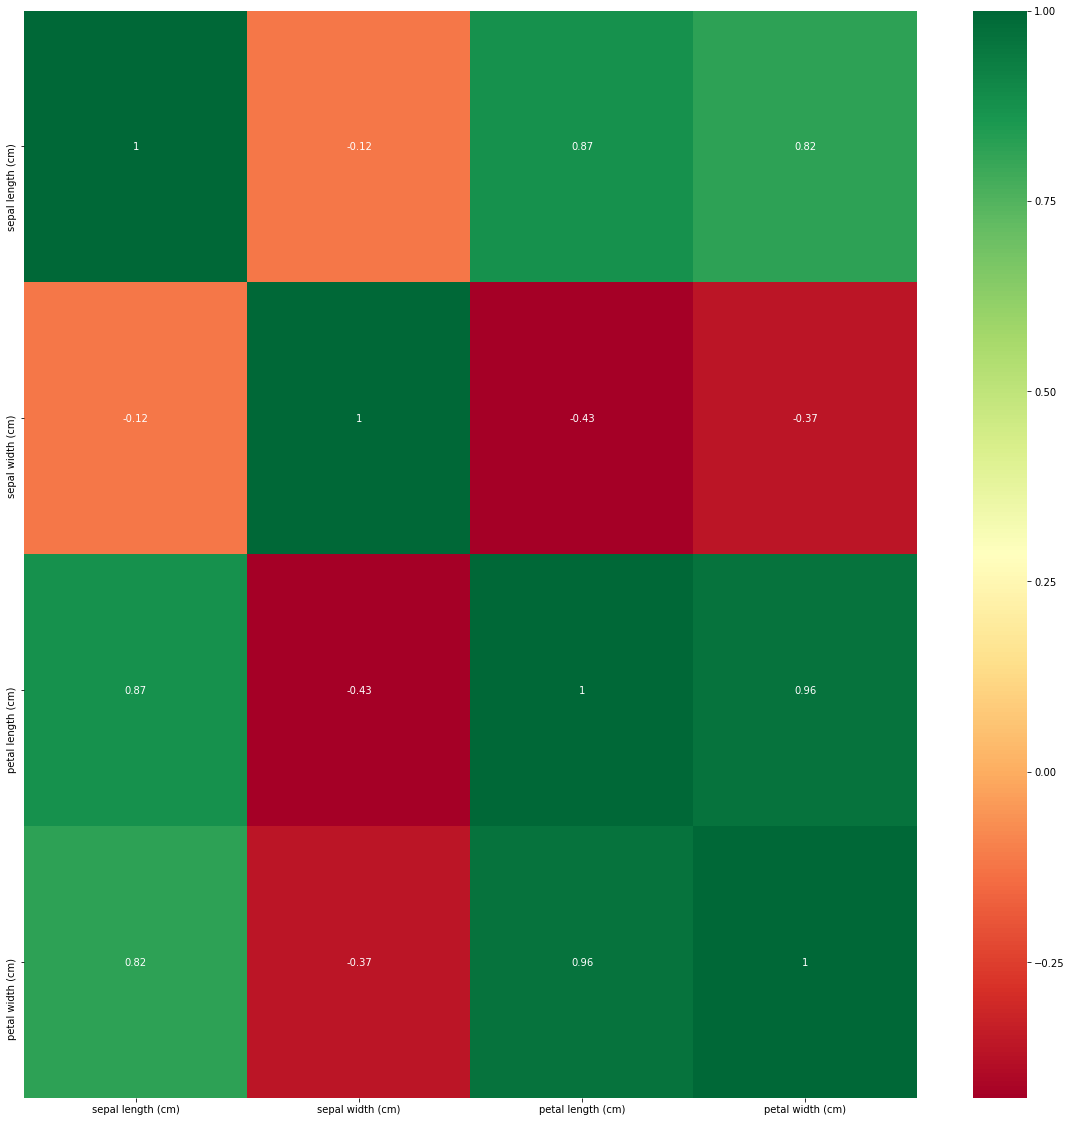

In [15]:
E = df.iloc[:,0:5]  #independent columns
f = df.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.11820501 0.02700389 0.4655617  0.38922939]


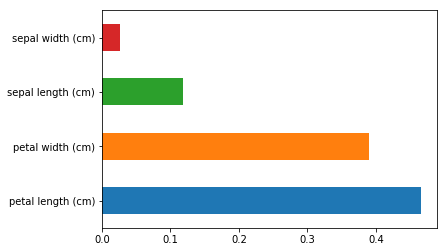

In [16]:
C = df.iloc[:,0:4]  #independent columns
d = df.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(C,d)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=C.columns)
feat_importances.nlargest(4).plot(kind='barh')
plt.show()


In [29]:
X=df[['petal length (cm)','petal width (cm)','sepal length (cm)']]

In [30]:
y=df['species']

In [31]:
from sklearn.model_selection import train_test_split


In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [33]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [34]:
y_pred = model.predict(X_test)
#predictions = [round(value) for value in y_pred]

In [35]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.78%
